In [3]:
import pandas as pd

class PPGSignal:
    def __init__(self, time_values, signal_values, sampling_period, metadata=None):
        self.time_values = time_values
        self.signal_values = signal_values
        self.sampling_period = sampling_period
        self.sampling_frequency = 1 / sampling_period
        self.metadata = metadata
    
    def __repr__(self):
        return (f"PPGSignal(Sampling Frequency: {self.sampling_frequency} Hz, "
                f"Samples: {len(self.time_values)}, Metadata: {self.metadata})")
    
    def summary(self):
        return {
            'Sampling Frequency': self.sampling_frequency,
            'Total Samples': len(self.time_values),
            'Metadata': self.metadata
        }

# Load the CSV file
file_path = 'data_ppg.csv'

data = pd.read_csv(file_path)

time_values = data['Time'].values  
signal_values = data['PPG'].values  

sampling_period = time_values[1] - time_values[0]  

# Create a PPGSignal object
ppg_signal = PPGSignal(time_values, signal_values, sampling_period, metadata="Dummy Source")

# Output summary
print(ppg_signal)
print(ppg_signal.summary())


PPGSignal(Sampling Frequency: 1250.0000000001376 Hz, Samples: 108250, Metadata: Dummy Source)
{'Sampling Frequency': 1250.0000000001376, 'Total Samples': 108250, 'Metadata': 'Dummy Source'}


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'data_ppg.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Replace 'Time' and 'PPG' with the actual column names from your dataset
time_column = 'Time'  # Update with the actual time column name
ppg_column = 'PPG'      # Update with the actual PPG column name

# # Time-Domain Plot
# plt.figure(figsize=(12, 6))
# plt.plot(data[time_column], data[ppg_column], color='blue', linewidth=1.5)
# plt.title('Time-Domain Plot of PPG Signal', fontsize=16)
# plt.xlabel('Time (s)', fontsize=14)
# plt.ylabel('PPG Amplitude', fontsize=14)
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('time_domain_plot.png', dpi=300)  # Save as a high-resolution image
# plt.show()

# # Frequency-Domain Plot
# # Sample rate (Hz)
# fs = 1000  # Update with the actual sampling frequency if known

# # Perform FFT
# N = len(data[ppg_column])
# yf = np.fft.fft(data[ppg_column])
# xf = np.fft.fftfreq(N, 1/fs)

# # Plot the spectrum
# plt.figure(figsize=(12, 6))
# plt.plot(xf[:N//2], np.abs(yf[:N//2]), color='red')  # Plot only the positive frequencies
# plt.title('Frequency-Domain Plot of PPG Signal', fontsize=16)
# plt.xlabel('Frequency (Hz)', fontsize=14)
# plt.ylabel('Magnitude', fontsize=14)
# plt.xlim(0, fs/2)  # Limit to Nyquist frequency
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('frequency_domain_plot.png', dpi=300)  # Save as a high-resolution image
# plt.show()

In [9]:
data

,Time,PPG
0,1.000021,5.19686
1,1.000821,5.12765
2,1.001621,5.05893
3,1.002421,4.99070
4,1.003221,4.92295
...,...,...
108245,87.596021,-0.36375
108246,87.596821,-0.34317
108247,87.597621,-0.32358
108248,87.598421,-0.30497


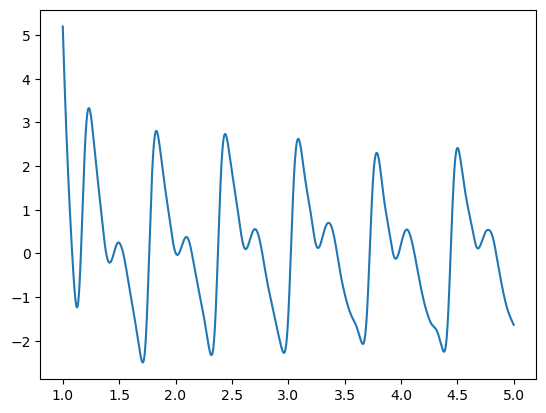

In [11]:
plt.plot(data["Time"].values[:5000], data["PPG"].values[:5000])

In [12]:
from scipy.signal import find_peaks

In [24]:
peakloc = find_peaks(data["PPG"].values[:5000])[0]

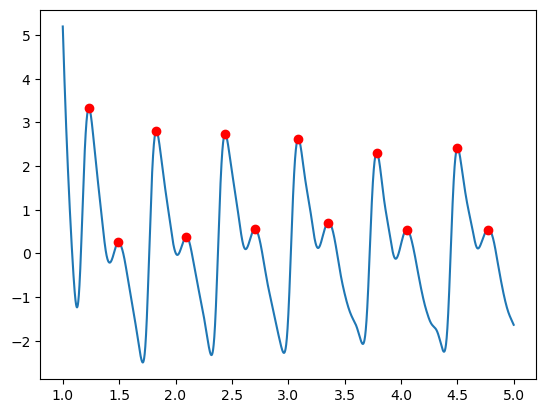

In [25]:
plt.plot(data["Time"].values[:5000], data["PPG"].values[:5000])
plt.plot(data["Time"].values[peakloc], data["PPG"].values[peakloc], 'ro')

In [17]:
peakloc[0]

array([ 289,  617, 1037, 1371, 1800, 2130, 2611, 2946, 3480, 3814, 4376,
       4716])

In [20]:
np.mean(data["PPG"].values[peakloc])

1.5986891666666667

In [28]:
np.where(data["PPG"].values[peakloc] > np.mean(data["PPG"].values[peakloc]))[0]

array([ 0,  2,  4,  6,  8, 10])

In [31]:
systolicpeaks = peakloc[np.where(data["PPG"].values[peakloc] > np.mean(data["PPG"].values[peakloc]))[0]]

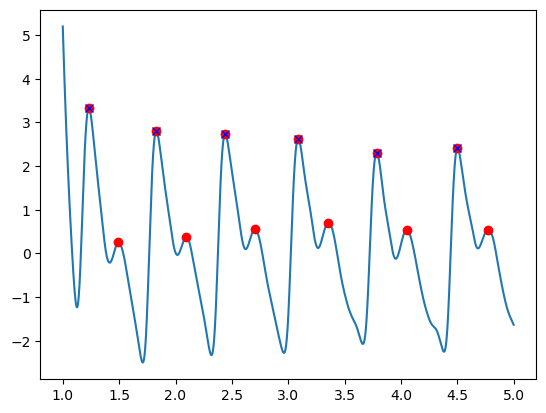

In [32]:
plt.plot(data["Time"].values[:5000], data["PPG"].values[:5000])
plt.plot(data["Time"].values[peakloc], data["PPG"].values[peakloc], 'ro')
plt.plot(data["Time"].values[systolicpeaks], data["PPG"].values[systolicpeaks], 'bx')

In [36]:
np.mean(np.diff(data["Time"].values[systolicpeaks]))

0.6539200000000001

In [37]:
1/0.6539200000000001

1.5292390506483973

In [38]:
1.5292390506483973 * 60

91.75434303890384

In [43]:
s = data["PPG"].values[:5000]
peakloc_p = find_peaks(s)[0]
peakloc_n = find_peaks(-s)[0]
p_mu = np.mean(s[peakloc_p])
n_mu = np.mean(s[peakloc_n])
s_loc = peakloc_p[np.where(s[peakloc_p] > p_mu)[0]]
d_loc = peakloc_p[np.where(s[peakloc_p] <= p_mu)[0]]
o_loc = peakloc_n[np.where(s[peakloc_n] < n_mu)[0]]
n_loc = peakloc_n[np.where(s[peakloc_n] >= n_mu)[0]]


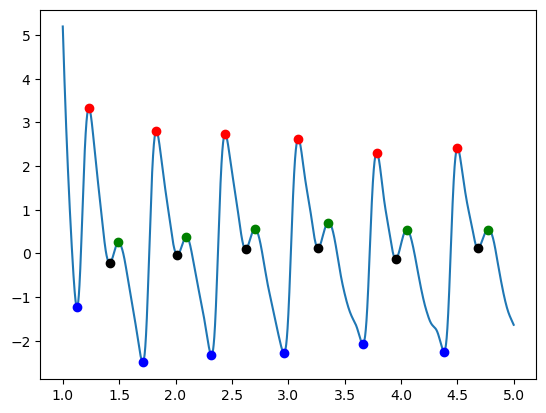

In [45]:
plt.plot(data["Time"].values[:5000], data["PPG"].values[:5000])
plt.plot(data["Time"].values[s_loc], data["PPG"].values[s_loc], 'ro')
plt.plot(data["Time"].values[d_loc], data["PPG"].values[d_loc], 'go')
plt.plot(data["Time"].values[o_loc], data["PPG"].values[o_loc], 'bo')
plt.plot(data["Time"].values[n_loc], data["PPG"].values[n_loc], 'ko')

In [42]:
peakloc_p

array([   289,    617,   1037,   1371,   1800,   2130,   2611,   2946,
         3480,   3814,   4376,   4716,   5301,   5655,   6242,   6595,
         7196,   7555,   8131,   8491,   9027,   9384,   9890,  10247,
        10726,  11082,  11547,  11898,  12364,  12713,  13186,  13538,
        14001,  14350,  14809,  15155,  15602,  15958,  16389,  16735,
        17162,  17513,  17939,  18285,  18721,  19068,  19517,  19858,
        20328,  20674,  21162,  21517,  22012,  22361,  22870,  23223,
        23720,  24078,  24560,  24918,  25395,  25756,  26231,  26584,
        27077,  27433,  27931,  28283,  28777,  29130,  29611,  29960,
        30442,  30793,  31271,  31627,  32113,  32468,  32965,  33316,
        33821,  34177,  34687,  35058,  35567,  35925,  36450,  36817,
        37335,  37699,  38212,  38572,  39074,  39440,  39931,  40288,
        40787,  41143,  41647,  41995,  42499,  42846,  43347,  43694,
        44206,  44554,  45089,  45436,  46014,  46364,  46953,  47308,
      